In [6]:
print(ph_data.columns.tolist())
print(station_metadata.columns.tolist())


['GEMS.Station.Number;"Sample.Date";"Sample.Time";"Depth";"Parameter.Code";"Analysis.Method.Code";"Value.Flags";"Value";"Unit";"Data.Quality"']
['GEMS Station Number', 'Local Station Number', 'Country Name', 'Water Type', 'Station Identifier', 'Station Narrative', 'Water Body Name', 'Main Basin', 'Upstream Basin Area', 'Elevation', 'Monitoring Type', 'Date Station Opened', 'Responsible Collection Agency', 'Latitude', 'Longitude', 'River Width', 'Discharge', 'Max. Depth', 'Lake Area', 'Lake Volume', 'Average Retention', 'Area of Aquifer', 'Depth of Impermeable Lining', 'Production Zone', 'Mean Abstraction Rate', 'Mean Abstraction Level']


In [ ]:
import pandas as pd

# Load datasets with correct separator and encoding
ph_data = pd.read_csv('pH.csv', sep=';')
station_metadata = pd.read_csv('GEMStat_station_metadata.csv', sep=';', encoding='ISO-8859-1')
parameter_info = pd.read_csv('GEMStat_parameter_metadata.csv', sep=';', encoding='ISO-8859-1')
methods_info = pd.read_csv('GEMStat_methods_metadata.csv', sep=';', encoding='ISO-8859-1')

# Check columns
print(ph_data.columns.tolist())
print(station_metadata.columns.tolist())


['GEMS.Station.Number', 'Sample.Date', 'Sample.Time', 'Depth', 'Parameter.Code', 'Analysis.Method.Code', 'Value.Flags', 'Value', 'Unit', 'Data.Quality']
['GEMS Station Number', 'Local Station Number', 'Country Name', 'Water Type', 'Station Identifier', 'Station Narrative', 'Water Body Name', 'Main Basin', 'Upstream Basin Area', 'Elevation', 'Monitoring Type', 'Date Station Opened', 'Responsible Collection Agency', 'Latitude', 'Longitude', 'River Width', 'Discharge', 'Max. Depth', 'Lake Area', 'Lake Volume', 'Average Retention', 'Area of Aquifer', 'Depth of Impermeable Lining', 'Production Zone', 'Mean Abstraction Rate', 'Mean Abstraction Level']


/var/folders/tq/7vkyx62523b_ly0hh2lnbrc80000gn/T/ipykernel_7463/466482969.py:4: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  ph_data = pd.read_csv('pH.csv', sep=';')


In [10]:
# Fix the station column name to match
station_metadata.rename(columns={'GEMS Station Number': 'GEMS.Station.Number'}, inplace=True)

# Merge pH data with station metadata based on 'GEMS.Station.Number'
merged = pd.merge(ph_data, station_metadata, how='left', on='GEMS.Station.Number')

# See first few rows
print(merged[['GEMS.Station.Number', 'Country Name', 'Latitude', 'Longitude', 'Value']].head())



  GEMS.Station.Number Country Name    Latitude   Longitude  Value
0            ARG00003    Argentina  -26,925888  -58,507027   7.75
1            ARG00003    Argentina  -26,925888  -58,507027   7.16
2            ARG00003    Argentina  -26,925888  -58,507027   7.56
3            ARG00003    Argentina  -26,925888  -58,507027   7.10
4            ARG00003    Argentina  -26,925888  -58,507027   7.47


In [ ]:
import pandas as pd

# Load data
ph_data = pd.read_csv('pH.csv', sep=';')
station_metadata = pd.read_csv('GEMStat_station_metadata.csv', sep=';', encoding='ISO-8859-1')

# Merge datasets
merged = pd.merge(ph_data, station_metadata, how='left', left_on='GEMS.Station.Number', right_on='GEMS Station Number')

# Show first few rows
print(merged[['Country Name', 'Sample.Date']].head())

# Show unique countries
print("\nUnique countries in data:")
print(merged['Country Name'].dropna().unique())

# Show year distribution (extract year from Sample.Date)
merged['Year'] = pd.to_datetime(merged['Sample.Date'], errors='coerce').dt.year
print("\nYears available in data:")
print(merged['Year'].dropna().unique())


/var/folders/tq/7vkyx62523b_ly0hh2lnbrc80000gn/T/ipykernel_7463/1612126973.py:4: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  ph_data = pd.read_csv('pH.csv', sep=';')


  Country Name Sample.Date
0    Argentina  2018-08-22
1    Argentina  2018-11-15
2    Argentina  2019-02-21
3    Argentina  2019-05-08
4    Argentina  2019-11-06

Unique countries in data:
['Argentina' 'Austria' 'Belgium' 'Bulgaria' 'Bosnia and Herzegovina'
 'Canada' 'Switzerland' 'Denmark' 'Spain' 'Estonia' 'Finland' 'France'
 'Greece' 'Croatia' 'India' 'Ireland' 'Iceland' 'Italy' 'Lithuania'
 'Latvia' 'Mexico' 'Macedonia (the former Yugoslav Republic of)'
 'Netherlands (the)' 'Norway' 'Poland' 'Portugal' 'Romania' 'Serbia'
 'Slovenia' 'Sweden' 'Uruguay' 'United States of America (the)']

Years available in data:
[2018 2019 2020 2021 2022 2011 2012 2013 2023 2009 2010 2014 2017 2016
 2008 2015 2001 2002 2003 2004 2005 2006 2007 2000 1999 1973 1974 1975
 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1972 1969 1963 1964 1965
 1966 1967 1968 1970 1971]


/var/folders/tq/7vkyx62523b_ly0hh2lnbrc80000gn/T/ipykernel_7463/491171086.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")


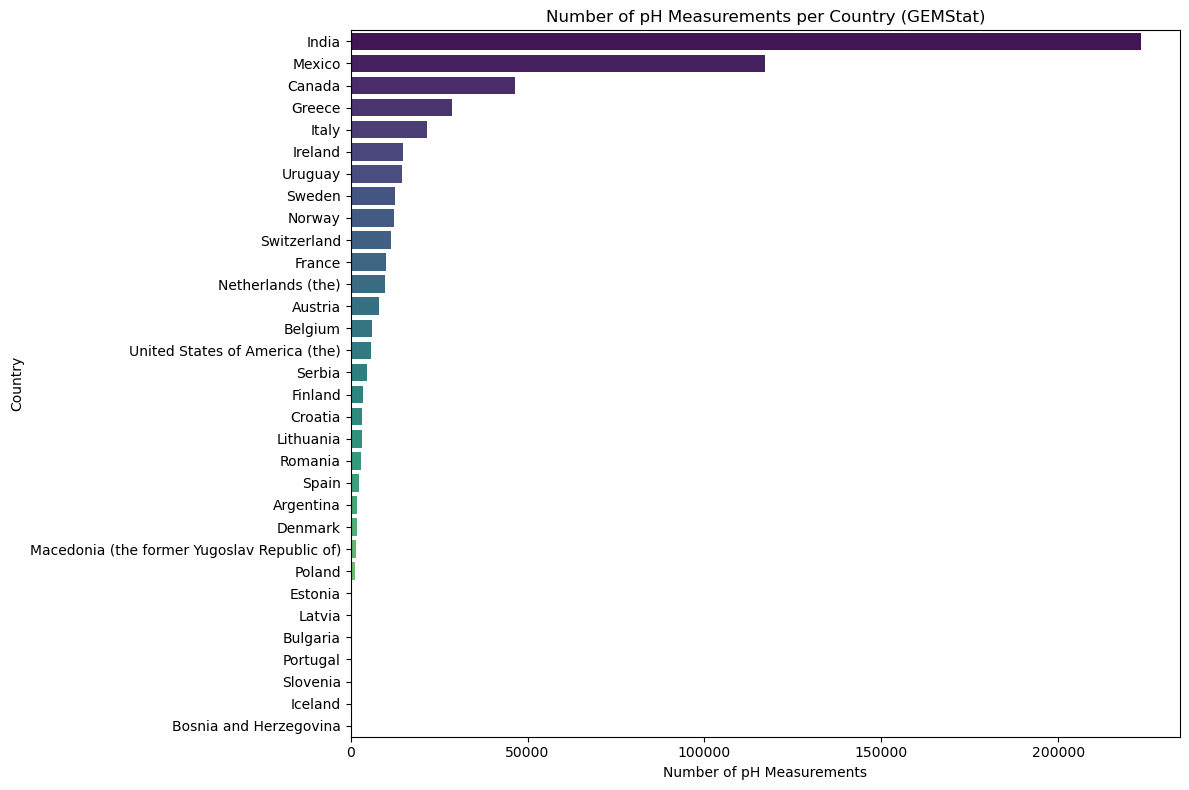

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count number of measurements per country
country_counts = merged['Country Name'].value_counts()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")
plt.xlabel("Number of pH Measurements")
plt.ylabel("Country")
plt.title("Number of pH Measurements per Country (GEMStat)")
plt.tight_layout()
plt.show()


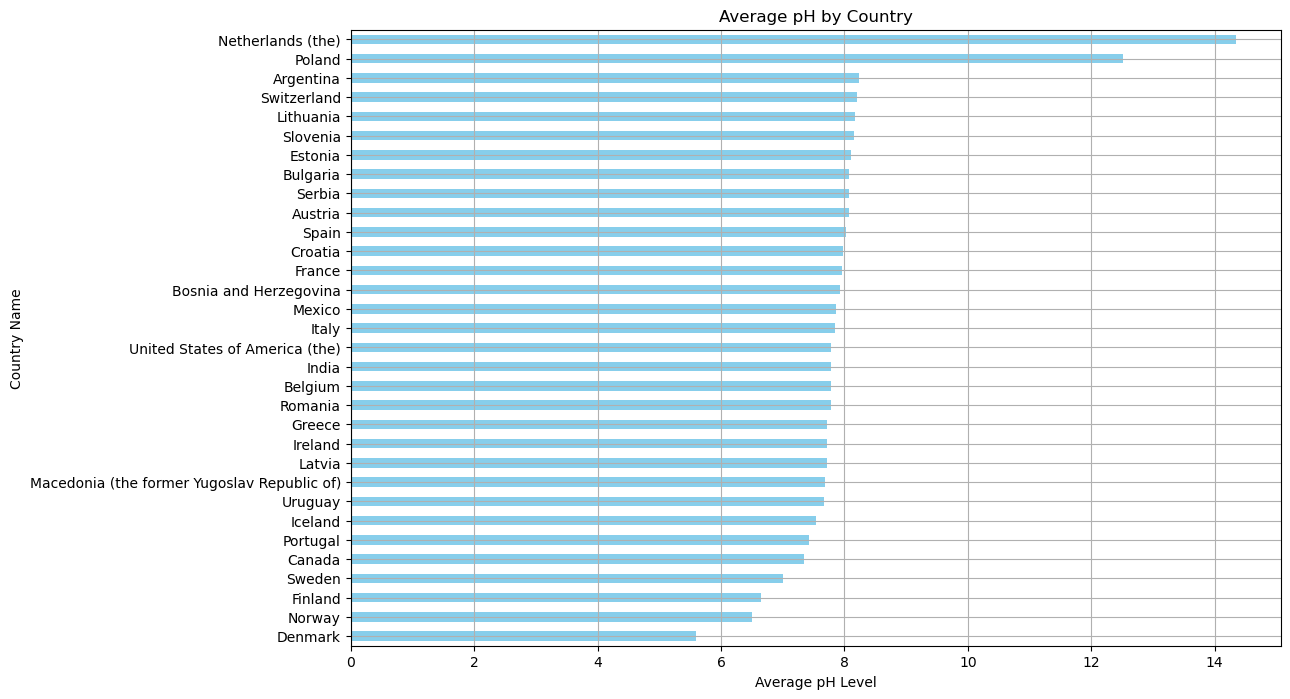

In [14]:
avg_ph_country = merged.groupby('Country Name')['Value'].mean().sort_values()

plt.figure(figsize=(12,8))
avg_ph_country.plot(kind='barh', color='skyblue')
plt.xlabel('Average pH Level')
plt.title('Average pH by Country')
plt.grid(True)
plt.show()


In [ ]:
# Only keep realistic pH values between 0 and 14
merged = merged[(merged['Value'] >= 0) & (merged['Value'] <= 14)]

#check
print(merged['Value'].describe())


count    569473.000000
mean          7.722133
std           0.691797
min           0.000000
25%           7.400000
50%           7.820000
75%           8.180000
max          13.660000
Name: Value, dtype: float64


/var/folders/tq/7vkyx62523b_ly0hh2lnbrc80000gn/T/ipykernel_7463/1134164246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poland_trend['Year'] = pd.to_datetime(poland_trend['Sample.Date']).dt.year


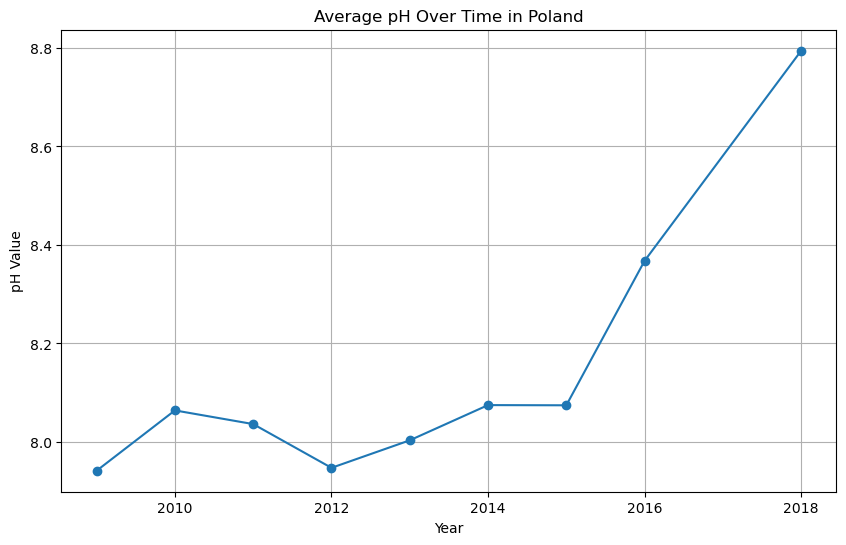

In [26]:
poland_trend = merged[merged['Country Name'] == 'Poland']
poland_trend['Year'] = pd.to_datetime(poland_trend['Sample.Date']).dt.year

avg_yearly_ph = poland_trend.groupby('Year')['Value'].mean()

plt.figure(figsize=(10,6))
avg_yearly_ph.plot(marker='o')
plt.title('Average pH Over Time in Poland')
plt.ylabel('pH Value')
plt.xlabel('Year')
plt.grid(True)
plt.show()


/var/folders/tq/7vkyx62523b_ly0hh2lnbrc80000gn/T/ipykernel_7463/1071755228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netherlands_trend['Year'] = pd.to_datetime(netherlands_trend['Sample.Date']).dt.year


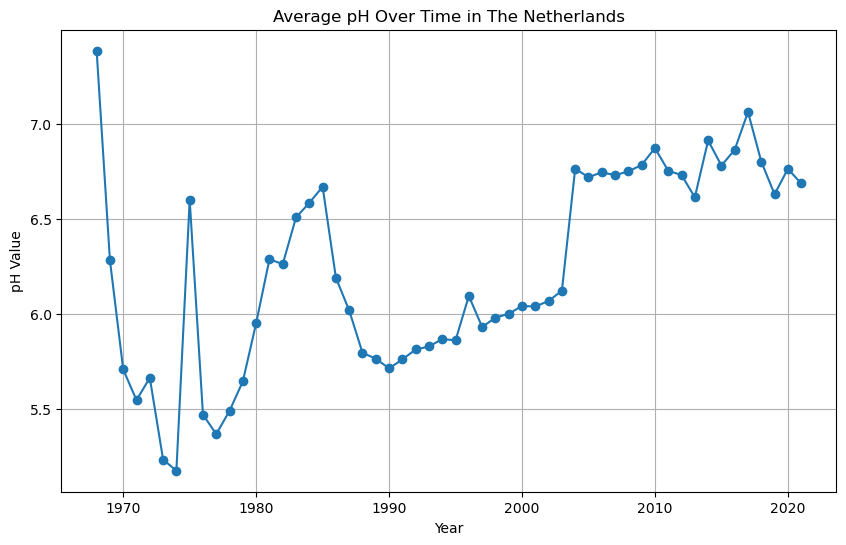

In [27]:
netherlands_trend = merged[merged['Country Name'] == 'Netherlands (the)']
netherlands_trend['Year'] = pd.to_datetime(netherlands_trend['Sample.Date']).dt.year

avg_yearly_ph = argentina_trend.groupby('Year')['Value'].mean()

plt.figure(figsize=(10,6))
avg_yearly_ph.plot(marker='o')
plt.title('Average pH Over Time in The Netherlands')
plt.ylabel('pH Value')
plt.xlabel('Year')
plt.grid(True)
plt.show()


/var/folders/tq/7vkyx62523b_ly0hh2lnbrc80000gn/T/ipykernel_7463/2420057739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  denmark_trend['Year'] = pd.to_datetime(denmark_trend['Sample.Date']).dt.year


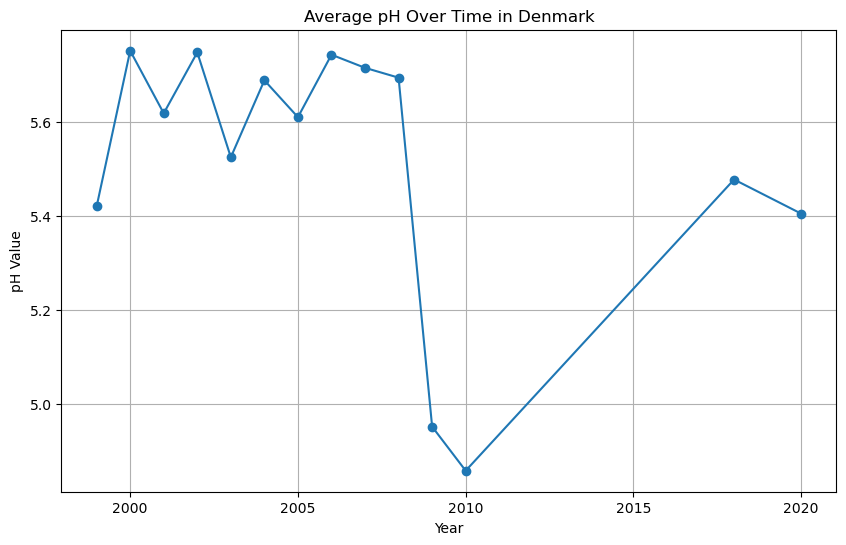

In [25]:
denmark_trend = merged[merged['Country Name'] == 'Denmark']
denmark_trend['Year'] = pd.to_datetime(denmark_trend['Sample.Date']).dt.year

avg_yearly_ph = denmark_trend.groupby('Year')['Value'].mean()

plt.figure(figsize=(10,6))
avg_yearly_ph.plot(marker='o')
plt.title('Average pH Over Time in Denmark')
plt.ylabel('pH Value')
plt.xlabel('Year')
plt.grid(True)
plt.show()


/var/folders/tq/7vkyx62523b_ly0hh2lnbrc80000gn/T/ipykernel_7463/135054489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norway_trend['Year'] = pd.to_datetime(norway_trend['Sample.Date']).dt.year


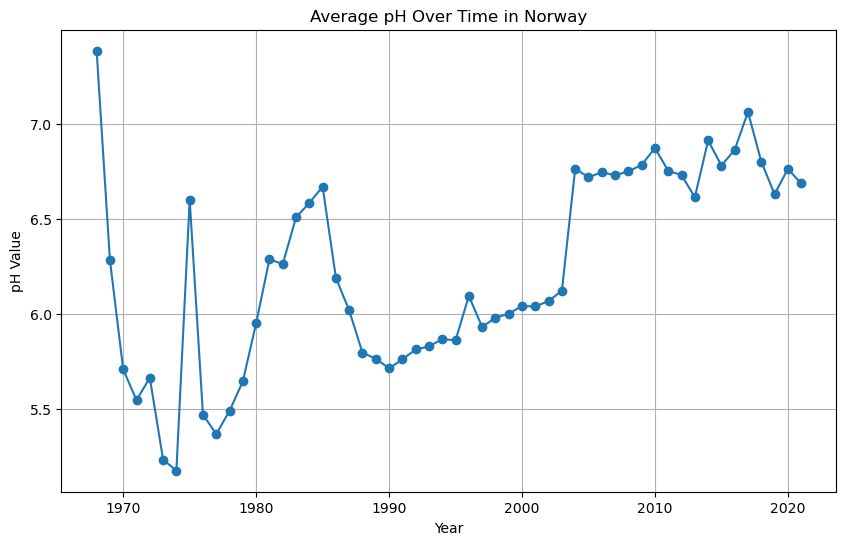

In [24]:
norway_trend = merged[merged['Country Name'] == 'Norway']
norway_trend['Year'] = pd.to_datetime(norway_trend['Sample.Date']).dt.year

avg_yearly_ph = argentina_trend.groupby('Year')['Value'].mean()

plt.figure(figsize=(10,6))
avg_yearly_ph.plot(marker='o')
plt.title('Average pH Over Time in Norway')
plt.ylabel('pH Value')
plt.xlabel('Year')
plt.grid(True)
plt.show()


In [28]:
import plotly.express as px

# Group by country and calculate mean pH
avg_ph_country = merged.groupby('Country Name')['Value'].mean().reset_index()

# Plot
fig = px.choropleth(
    avg_ph_country,
    locations="Country Name",
    locationmode="country names",
    color="Value",
    color_continuous_scale="Viridis",
    title="Average pH by Country"
)
fig.show()


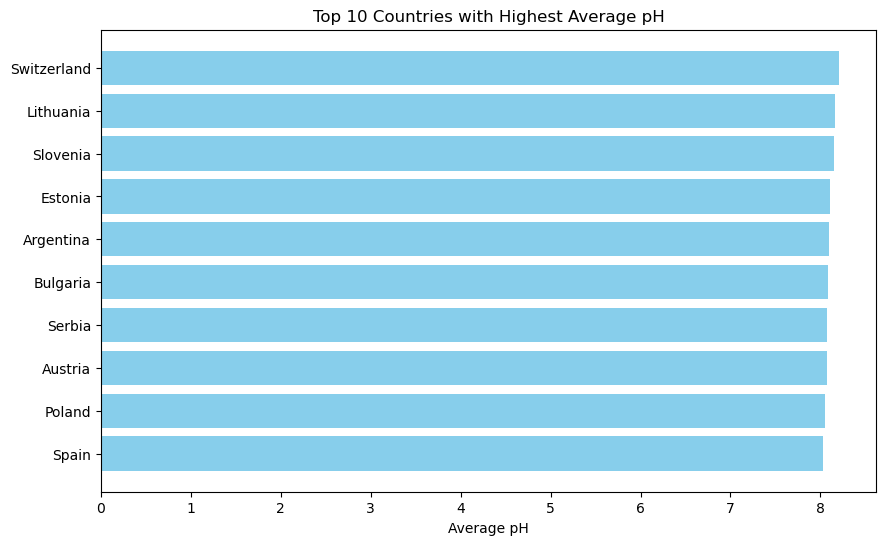

In [29]:
# Top 10 countries with highest pH
top10_ph = avg_ph_country.sort_values(by='Value', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
plt.barh(top10_ph['Country Name'], top10_ph['Value'], color='skyblue')
plt.title('Top 10 Countries with Highest Average pH')
plt.xlabel('Average pH')
plt.gca().invert_yaxis()
plt.show()
